
### Chart parameters overview

Seaborn is a great tool for quickly producing formatted plots without much coding work. However, by adding a few chart parameters to a plotting function, we can customize our plots and present more complex information.

For example, we can make it easier to compare plots by positioning them side-by-side. We can also show trends for multiple groups through differences in color and style in a single plot. We can even use seaborn parameters to make our plots publication-ready by adding titles, writing in annotations, and choosing color palettes that are appropriate to the plot’s use.

In this lesson, we will:

-   Add confidence intervals to bars and lines
-   Adjust the color and style of lines and points
-   Create multi-plot displays
-   Annotate plots to make them even more informative!

In the Jupyter notebook to the right, we’ll start by running some code examples to see how modifying chart parameters can transform our plots.

### Show error bars and uncertainty

To display summaries of our data visually, we often plot statistics like the mean. These statistics may be more or less precise. Frequently, we quantify this uncertainty through confidence intervals, which account for the spread and number of data points included in the computation of our summary statistic.

We can illustrate confidence intervals using features like error bars and shaded regions. For example, the  `bar.plot()`  function in seaborn automatically plots an error line on each bar of the plot. The line (called an  **error bar**) has a length that represents a 95% confidence interval for that statistic.

Additional parameters for the style of the error bars include color (`errcolor`), width (`errwidth`), and cap length (`capsize`). For example, we could use the following code to make a bar plot of mean  `sales_totals`  for each  `server`  with thick red error bars with long caps.

```
sns.barplot(data=df, x='server', y='sales_totals', errcolor='red', errwidth=5, capsize=0.5)

```

We can also show confidence intervals on line plots using shaded regions. Seaborn’s  `line.plot()`  function automatically plots shading for confidence intervals when the values are averages. The style can be changed from a shaded error band to vertical error bars using the  `err_style`  parameter as shown in the following code.

```
sns.barplot(data=df, x='server', y='sales_totals', errcolor='red', errwidth=5, capsize=0.5)
```

Let’s create a couple of plots and adjust how the confidence intervals are displayed.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
fires = pd.read_csv('fires.csv')

In [2]:
%matplotlib inline
plt.rcParams['figure.dpi']=72

1. After running the first two code cells, write the code to make a bar plot of the mean number of `firespots` for each `state` in the `fires` dataset. Put the state names on the y axis so that the bars are horizontal in the plot.

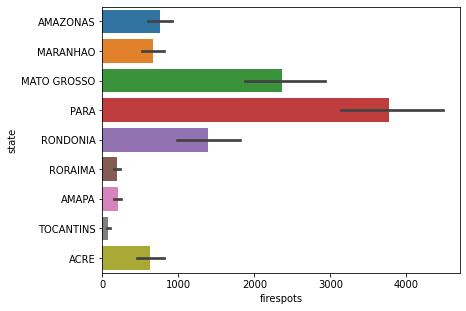

In [3]:
sns.barplot(data=fires, x='firespots', y='state')
plt.show()

2. Let's define the error bars differently. Create the same plot as you did in step 1, but adjust the error bar style as follows:
* change the color to blue
* change the width to 2
* add caps with length 0.3

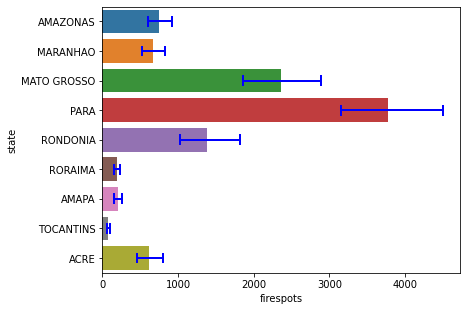

In [4]:
sns.barplot(data=fires, x='firespots', y='state', errcolor='blue', errwidth=2, capsize=0.3)
plt.show()

3. From the same dataset, make a line plot of average number of `firespots` by `month`, where `month` is on the x-axis.

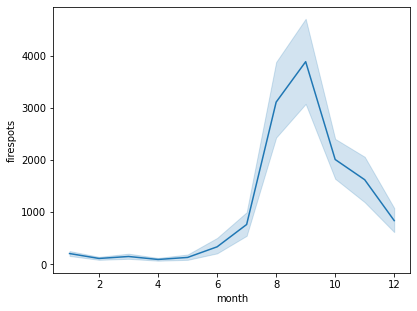

In [5]:
sns.lineplot(data=fires,x='month',y='firespots')
plt.show()

4. Create the same line plot as you did in step 3, but change the confidence interval style from bands to bars.

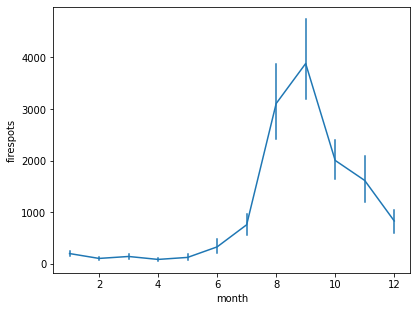

In [6]:
sns.lineplot(data=fires,x='month',y='firespots',err_style='bars')
plt.show()


### Group with hue and style

One major difference between matplotlib and seaborn is how elements by group are added to the same plot. In matplotlib, we have to identify and label each group that will be added to the plot. This is why wide-format data is sometimes easier to use for matplotlib plots.

In contrast, when our data is in long-format, we can add plot elements by group with seaborn by setting the  `hue`  parameter to the grouping variable. Most plot functions include the  `hue`  parameter, and many also include the  `style`  parameter to differentiate groups by line or point style as well. Seaborn includes a legend by default, so there is no extra coding required to create and label the legend.

The following code creates a scatter plot of  `sales_totals`  versus  `daily_customers`. We can group the points in different colors for each day of the week by setting  `hue`  to  `weekday`.

```
sns.scatterplot(data=df, x='daily_customers', y='sales_totals', hue='weekday')
```

By setting the  `style`  parameter to the grouping variable, the points will also be a different shape for each group. The  `style`  parameter makes the plot more visually accessible and is also a great alternative to  `hue`  for publishing in grayscale. The  `size`  parameter may also be used as a grouping parameter to change the point size by group.

The  `hue`  parameter can be used in most plot functions. The following code produces a line plot of average  `sales`  per  `month`  where each  `location`  has a line that is a unique color and pattern. We made all the lines thicker by setting the  `linewidth`  parameter to  `3`.

```
sns.lineplot(data=df, x='month', y='sales', hue='location', style='location', linewidth=3)

```

Adding the  `hue`  parameter in functions like  `sns.histplot()`,  `sns.kdeplot()`, and  `sns.boxplot()`  allows us to view the distributions of multiple groups. While there is no  `style`  parameter for these functions, we can adjust the  `multiple`  parameter for histograms and KDE plots.

In [7]:
plants = pd.read_csv('plants.csv')

1. After running the first two code cells, make a scatter plot from the `plants` dataset of `Leaf_length` (y-axis) versus `Plant_height` (x-axis) with point color by `PH`.

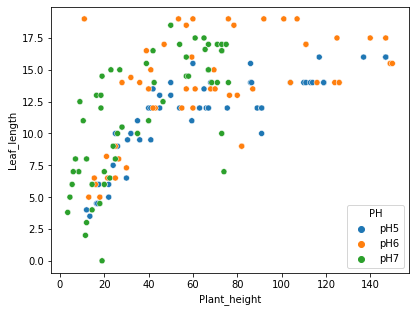

In [8]:
## YOUR SOLUTION HERE ##
sns.scatterplot(data=plants,x='Plant_height',y='Leaf_length',hue="PH")
plt.show()

2. The color in the previous plot helps us see the relationship between plant height and leaf length for each pH level, but the points are pretty small and the colors may not be easy for everyone to differentiate. Make the same plot as step 1, but additionally make the point style different by `PH` and increase all the point sizes by setting the `s` parameter to 100.

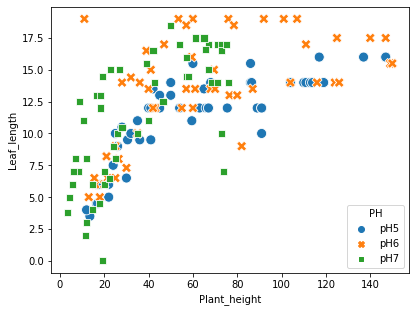

In [9]:
## YOUR SOLUTION HERE ##
sns.scatterplot(data=plants,x='Plant_height',y='Leaf_length',hue="PH",style='PH',s=100)
plt.show()

3. Make a line plot of `Lateral_spread` over `Time` using the `plants` dataset and color lines by `PH`.

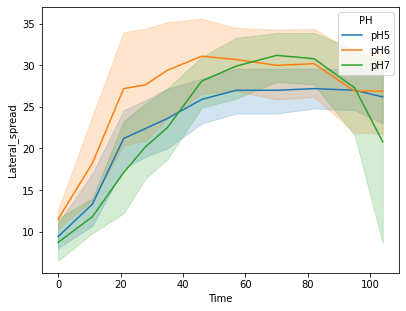

In [10]:
## YOUR SOLUTION HERE ##
sns.lineplot(data=plants,x='Time',y='Lateral_spread',hue='PH')
plt.show()

4. Let's improve visibility of the different groups by adding the `style` parameter and setting the line width to 3. Let's also remove the confidence intervals by adding `ci=None`.

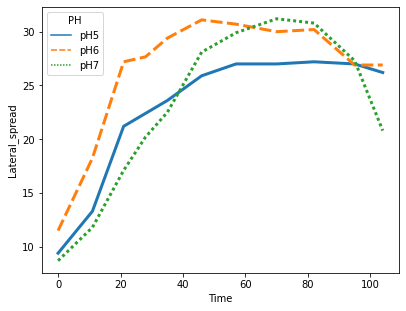

In [11]:
## YOUR SOLUTION HERE ##
sns.lineplot(data=plants,x='Time',y='Lateral_spread',hue='PH',style ='PH', linewidth=3,errorbar=None)
plt.show()

### Display multiple graphs

While the  `hue`  and  `style`  parameters can help add more information to the same plot, too much information in one plot can make it difficult to understand. When we want to be able to make comparisons without overcomplicating a single plot, we may want to use  **faceting**, where we make one plot for each group and align them next to each other.

In seaborn, we can use the  `sns.FacetGrid()`  function to build a grid of plots and then map a plotting function onto it. Alternatively, we may use one of a few plotting functions that are built off of  `sns.FacetGrid()`. These functions take a  `kind`  parameter to specify the type of plot and then add the familiar parameters like  `data`,  `x`,  `y`,  `hue`, or  `style`.

-   `sns.relplot()`  plots relational data of multiple variables like  `'line'`  or  `'scatter'`  plots.
-   `sns.displot()`  plots distributional data like histograms (`'hist'`) or  `'kde'`  plots.
-   `sns.catplot()`  plots categorical data like  `'bar'`  or  `'box'`  plots.

To create the facets, we set one of two parameters to a grouping variable:  `row`  to display the plot vertically in rows or  `col`  to display the plots horizontally in columns.

The following code plots multiple line plots horizontally, one plot for each  `year`.

```

```

So when might we want to switch from  `sns.lineplot()`  to  `sns.relplot()`?

The function  `sns.lineplot()`  and the other familiar plotting functions:

-   are all  **axes-level**  functions
-   integrate well with other matplotlib functions
-   provide control of the plots individually and position them together with more flexibility, allowing for more complex or custom layouts

Functions like  `sns.relplot()`  that build off of  `sns.FacetGrid()`:

-   are  **figure-level**  functions
-   make it easy to facet the same plot type across groups with a legend automatically positioned outside the plots
-   don’t provide as much individual control over the plots or their positions, but lots of the work is done for us already

When using multiple plots just to explore a dataset, there are other functions in seaborn that may be more useful.

-   `sns.pairplot()`  plots multiple variables in pairs so that we can quickly check many variables for notable relationships.
-   `sns.jointplot()`  plots two variables together along with their individual distributions in the margins so that we can quickly check out a relationship on multiple levels at once.

In [12]:
plants.describe(include='all')

,Time,PH,Plant,Plant_height,Lateral_spread,Leaf_length,Leaf_width
count,165.000000,165,165.000000,165.000000,165.000000,165.000000,165.000000
unique,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,pH5,NaN,NaN,NaN,NaN,NaN
freq,NaN,55,NaN,NaN,NaN,NaN,NaN
mean,49.909091,NaN,8.000000,56.963636,23.890909,12.089697,6.369091
std,33.130713,NaN,4.333646,37.885159,8.341681,4.282418,2.251358
min,0.000000,NaN,1.000000,3.500000,0.000000,0.000000,0.000000
25%,21.000000,NaN,4.000000,25.000000,18.000000,9.000000,5.000000
50%,46.000000,NaN,8.000000,53.500000,25.000000,13.000000,7.000000
75%,82.000000,NaN,12.000000,76.000000,30.000000,15.000000,8.000000


C:\Users\rocka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


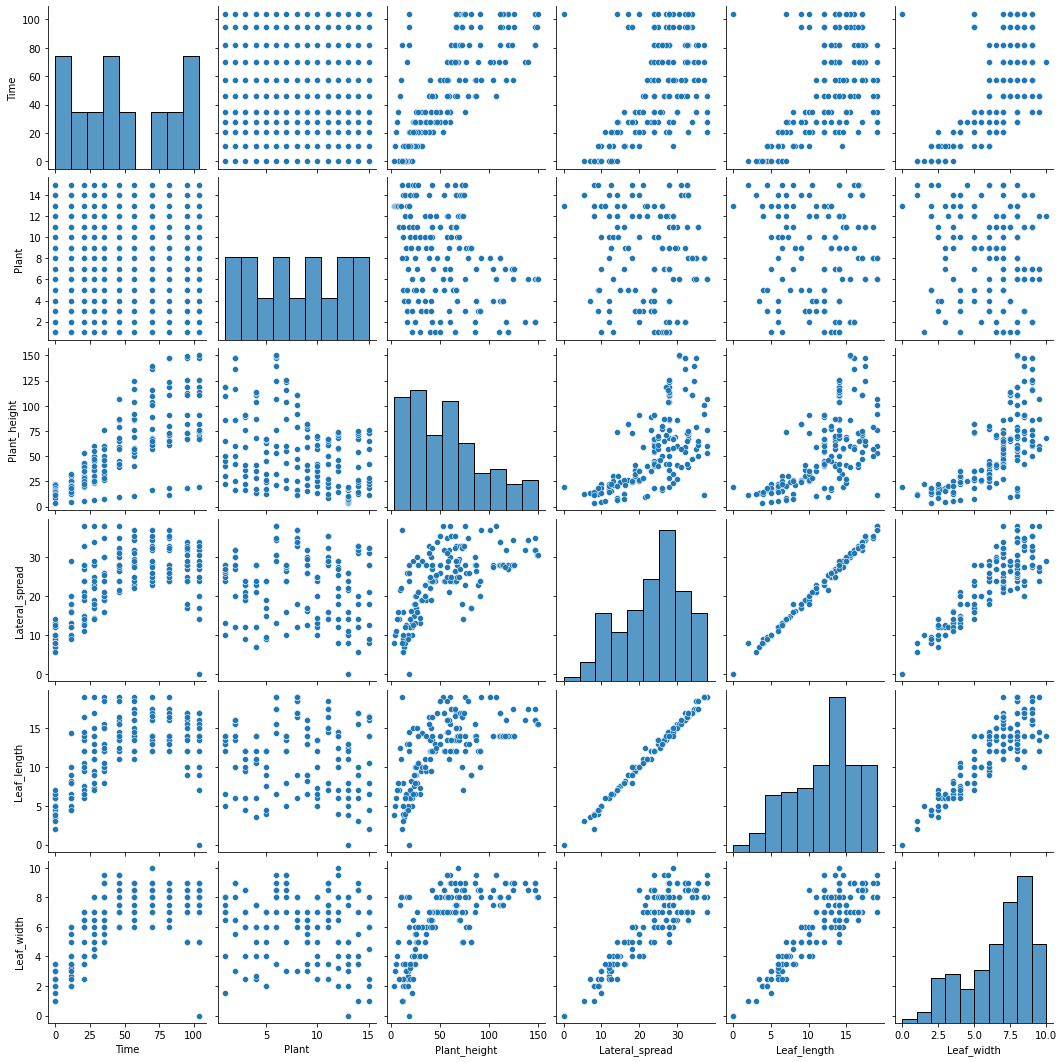

In [13]:
sns.pairplot(data=plants)
plt.show()

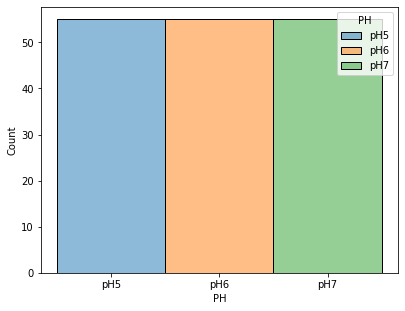

In [14]:
sns.histplot(data=plants,x='PH',hue='PH')
plt.show()

C:\Users\rocka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


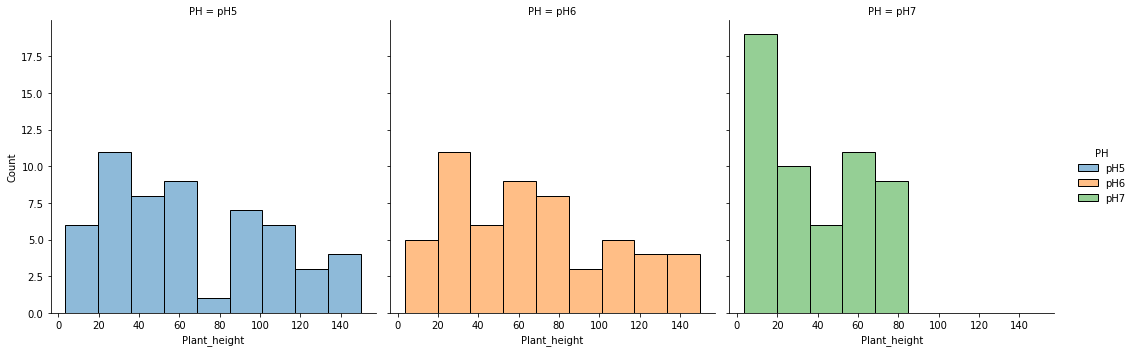

In [15]:
sns.displot(kind='hist',data=plants,x='Plant_height',hue='PH',col='PH')
plt.show()

C:\Users\rocka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


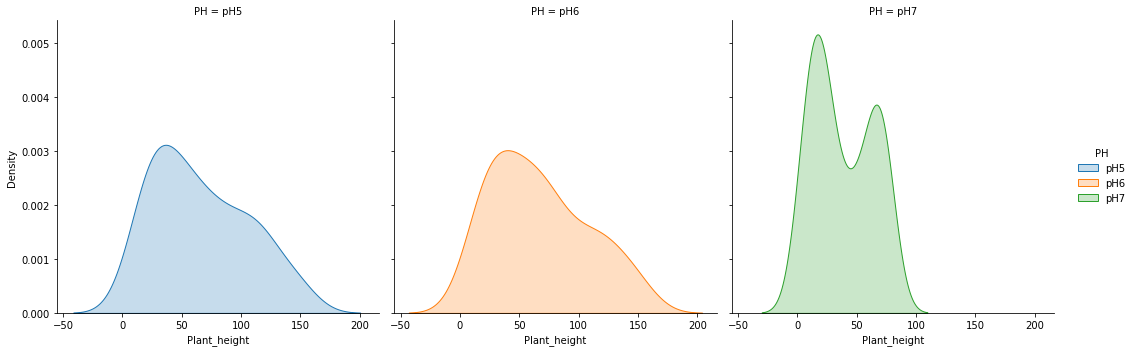

In [16]:
sns.displot(kind='kde',data=plants,x='Plant_height',hue='PH',col='PH',fill=True)
plt.show()

### Use color palettes

Seaborn makes it easy to customize which set of colors it uses in its plot functions. There are premade sets of colors to choose from as well as the flexibility to design our own.

#### Palette options

Seaborn includes six  **qualitative**  color palettes: deep, muted, pastel, bright, dark, and colorblind. These palettes are six versions of the same set of colors that are in no specific order, making them a good choice for categorical data groups.

![Image showing the six colors palettes available in seaborn as rows of six squares in each color.](https://content.codecademy.com/programs/dataviz-python/unit-5/seaborn-design-2/article2_image6.png)

However, if we have ordered data, we may be better off with a choice between two types of ordered palettes:

-   **Sequential**  palettes change from lighter to darker colors in one direction. These palettes may be a good choice for ordered categories or continuous numeric scales.![Ten squares arranged in a horizontal line that progressively change from white to blue.](https://static-assets.codecademy.com/Courses/data-viz-with-python/seqBlues.svg)
-   **Diverging**  palettes generally include a sequence over two colors where increments change from dark to light in the center to dark again at the end. These palettes may be a good choice to show absolute values for data that include both negative and positive values, or data where two things are opposites, like political parties or favorable and unfavorable outcomes.![Ten squares arranged in a horizontal line that progressively change from blue to white to orange.](https://static-assets.codecademy.com/Courses/data-viz-with-python/diverging.svg)

For any of the three palette types, we can choose from  [seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html),  [matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html), or  [Color Brewer](https://colorbrewer2.org/)  included palettes.

#### Custom palettes

We can also name and create a custom palette with  `sns.color_palette()`. For example, to make a sequential color palette of blues from light to dark in 10 increments, we can use the following code:

```

```

We can make our  `seqBlues`  palette into a matplotlib continuous colormap by swapping  `n_colors=10`  for  `as_cmap=True`. Other seaborn palette functions with more specific objectives can also be used for palette creation, such as  `sns.light_palette()`  or  `sns.diverging_palette()`.

#### Applying palettes

We can change a plot’s palette by setting the  `palette`  parameter to the palette’s name. Premade palette names are given in quotes, while custom palettes are given without quotes.

```

```

Finally, we can apply settings to all plots by running a function at the start of our notebook:

-   `sns.set_palette()`  applies the same color palette to all plots.
-   `sns.set_theme()`  sets the same plotting parameters to all plots, including features like borders, grids, and background color.

In [17]:
heights = pd.read_csv('plants_long.csv')

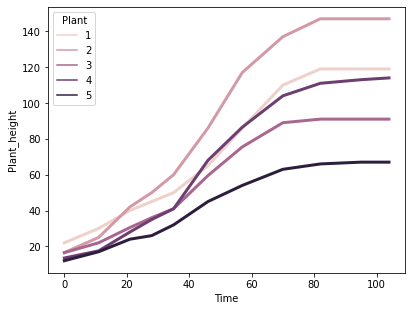

In [18]:
sns.lineplot(data=heights, x='Time', y='Plant_height', hue='Plant', linewidth=3)
plt.show()


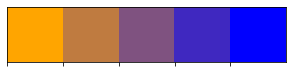

In [19]:
## YOUR SOLUTION HERE ##
plantpal = sns.color_palette("blend:orange,blue",n_colors=5)

# view palette squares
sns.palplot(plantpal)

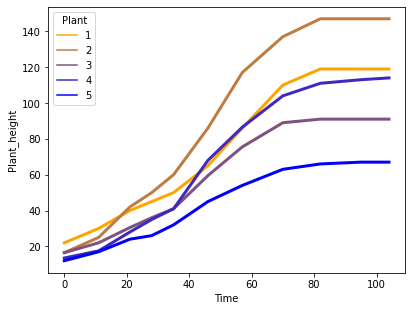

In [20]:
## YOUR SOLUTION HERE ##
sns.lineplot(data=heights, x='Time', y='Plant_height', hue='Plant', linewidth=3,palette=plantpal)
plt.show()

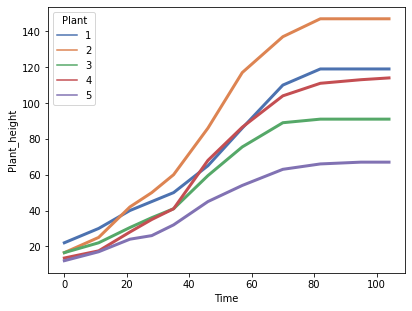

In [21]:
# colorblind

sns.lineplot(data=heights, x='Time', y='Plant_height', hue='Plant', linewidth=3,palette='deep')
plt.show()


### Add labels and annotations

Colors and styles help us create clear, informative plots. We can add even more clarity and specialized information with titles, labels, and annotations. These are often essential to helping our audience get as much as possible out of the plot, particularly if they are less familiar with the underlying data or research. Let’s start with adding basic titles and renaming axis labels.

#### Single plot

For axes-level plots, like  `sns.lineplot()`  or  `sns.boxplot()`, we can quickly add a title and axis labels as parameters of  `.set()`. The following example plots a histogram with a title and customized axis labels.  _Note:_  Throughout this exercise, axes-level plots will be named  `axplot`  while figure-level plots will be named  `figplot`.

```
# create a histogram of ages
axplot = sns.histplot(data= df, x='age')
# add titles and update axis labels
axplot.set(title="Distribution of Ages", xlabel="Age (in years)", ylabel="Count")
```

We can also add text annotations at a specific point (x, y) using  `.annotate()`  at the axes level. The following code adds annotations in red, marking the first and second modes in the age histogram saved as  `axplot`.

```
# text for first mode
axplot.annotate(text="First Mode", xy=(24,40), color='red')
# text for second mode
axplot.annotate(text="Second Mode", xy=(32,50), color='red')
```

#### Multiple plots

For figure-level plots, like  `sns.relplot()`  or  `sns.catplot()`, we set the axis labels for all the plots in the figure using  `.set_axis_labels()`. The following code creates a row of histograms showing the distribution of  `age`  for each  `location`  in the dataset  `df`.

```
# create histogram of ages for each location
figplot = sns.displot(kind='hist', data= df, x='age', col='location')
# set axis labels for all plots
figplot.set_axis_labels(xlabel="Age (in years)", ylabel="Count")
```

We can use  `.set_titles()`  and a  `{col_name}`  template to programmatically give an axes-level title to each plot in the figure. The following code adds a unique title for each plot by substituting the location name for  `{col_name}`  in the string.

```
# add a histogram title for each location
figplot.set_titles("Distribution of Ages in {col_name}")
```

_Note:_  We would use  `{row_name}`  instead of  `{col_name}`  if we had used  `row=location`  instead of  `col=location`  in  `sns.displot()`  earlier.

To add a main title to a figure-level plot, we can use the following code.

```
figplot.fig.suptitle("Age Distributions for Locations in the U.S.", y=1.05 )
```

Setting  `y=1.05`  places the title above the plot so it doesn’t overwrite any axes-level titles.

Finally, we can add the same annotation to the first histogram in the figure by accessing the specific plot within the figure.

```
figplot.axes.flat[0].annotate(text="There are two modes in the first histogram", xy=(29,50), color='red')
```

In [25]:
waste=pd.read_csv("waste.csv")

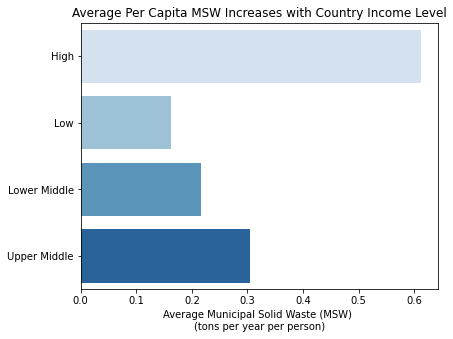

In [27]:
# plot
p = sns.barplot(data=waste, x='msw', y='income', errorbar=None, palette='Blues')
# labels
p.set(title="Average Per Capita MSW Increases with Country Income Level", 
      xlabel="Average Municipal Solid Waste (MSW) \n(tons per year per person)", 
      ylabel="")

plt.show()

In [28]:
# find the mean MSW for each income and round to 2 places
mean_msw = waste.groupby('income')['msw'].mean().round(2)

# print mean_msw
print(mean_msw)


income
High            0.61
Low             0.16
Lower Middle    0.22
Upper Middle    0.30
Name: msw, dtype: float64


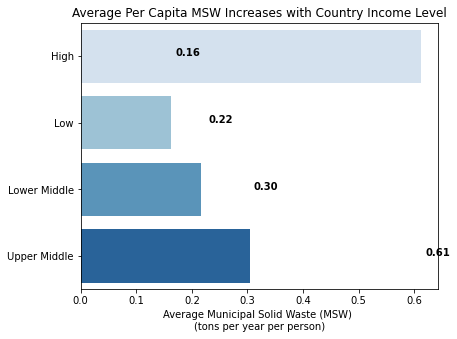

In [31]:
# plot
p = sns.barplot(data=waste, x='msw', y='income', errorbar=None, palette='Blues')

# labels
p.set(title='Average Per Capita MSW Increases with Country Income Level', 
      xlabel='Average Municipal Solid Waste (MSW) \n(tons per year per person)', 
      ylabel='')

# annotations
p.annotate(text="0.16", xy=(0.17,0), weight='bold')
p.annotate(text="0.22", xy=(0.23,1), weight='bold')
p.annotate(text="0.30", xy=(0.31,2), weight='bold')
p.annotate(text="0.61", xy=(0.62,3), weight='bold')

plt.show()

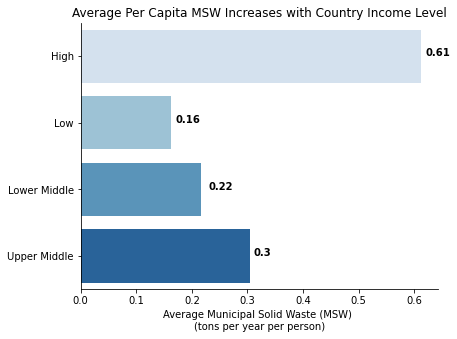

In [33]:
# plot
p = sns.barplot(data=waste, x='msw', y='income', errorbar=None, palette='Blues')

# labels
p.set(title='Average Per Capita MSW Increases with Country Income Level', 
      xlabel='Average Municipal Solid Waste (MSW) \n(tons per year per person)', 
      ylabel='')

# annotations
for i,msw in enumerate(mean_msw):
    p.annotate(text=str(msw), xy=(msw+0.01,i), weight='bold')

# remove top and right borders
p.spines['top'].set_visible(False)
p.spines['right'].set_visible(False)

plt.show()